In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import re
import time
import matplotlib.pyplot as plt

In [28]:
games = pd.read_csv("games.csv", index_col = False)

In [29]:
games['date'] = games['date'].astype(str).str[:10]


In [30]:
games.drop(['status', 'time'], axis = 1, inplace = True)
games.reset_index()
games.head()

,Unnamed: 0,id,date,home_team_score,period,postseason,season,visitor_team_score,home_team_id,visitor_team_id
0,0,857369,2022-10-20,97,4,False,2022,103,14,13
1,1,857370,2022-10-20,88,4,False,2022,90,23,17
2,2,857381,2022-10-21,113,5,False,2022,111,25,24
3,3,857374,2022-10-21,102,4,False,2022,100,30,5
4,4,857376,2022-10-21,122,4,False,2022,129,11,15


In [35]:
teams = pd.read_csv("teams")
teams.head()

,Unnamed: 0,id,abbreviation,city,conference,division,full_name,name
0,0,1,ATL,Atlanta,East,Southeast,Atlanta Hawks,Hawks
1,1,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
2,2,3,BKN,Brooklyn,East,Atlantic,Brooklyn Nets,Nets
3,3,4,CHA,Charlotte,East,Southeast,Charlotte Hornets,Hornets
4,4,5,CHI,Chicago,East,Central,Chicago Bulls,Bulls


In [40]:
# Merge for home_team_name
merged_home = pd.merge(left=games, right=teams[['id', 'full_name']], 
                        how='left', left_on='home_team_id', right_on='id')

# Rename the 'full_name' column to 'home_team_name' and drop the extra 'id' column
merged_home.rename(columns={'full_name': 'home_team_name'}, inplace=True)
merged_home.drop(columns='id', inplace=True)

# Merge for visitor_team_name
merged_final = pd.merge(left=games, right=teams[['id', 'full_name']], 
                        how='left', left_on='visitor_team_id', right_on='id')

# Rename the 'full_name' column to 'visitor_team_name' and drop the extra 'id' column
merged_final.rename(columns={'full_name': 'visitor_team_name'}, inplace=True)
merged_final.drop(columns='id', inplace=True)

teams = merged_final

KeyError: "None of [Index(['id', 'full_name', 'abbreviation'], dtype='object')] are in the [columns]"

In [38]:
teams.head()

,Unnamed: 0,id_x,date,home_team_score,period,postseason,season,visitor_team_score,home_team_id,visitor_team_id,id_y,visitor_team_name,visitor_team_abb
0,0,857369,2022-10-20,97,4,False,2022,103,14,13,13,LA Clippers,LAC
1,1,857370,2022-10-20,88,4,False,2022,90,23,17,17,Milwaukee Bucks,MIL
2,2,857381,2022-10-21,113,5,False,2022,111,25,24,24,Phoenix Suns,PHX
3,3,857374,2022-10-21,102,4,False,2022,100,30,5,5,Chicago Bulls,CHI
4,4,857376,2022-10-21,122,4,False,2022,129,11,15,15,Memphis Grizzlies,MEM


In [33]:
games.to_csv('games.csv')

<Axes: xlabel='home_team_score', ylabel='Count'>

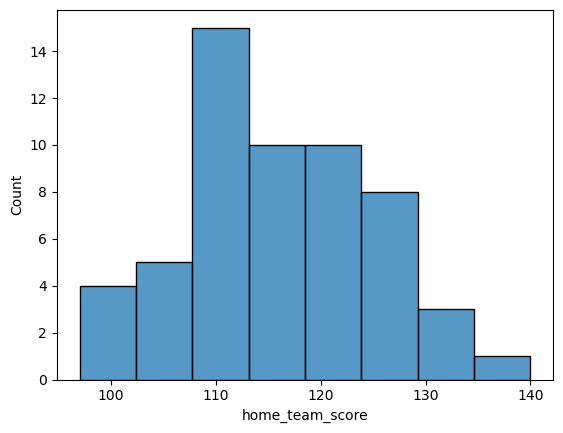

In [32]:
sns.histplot(games['home_team_score'][games['home_team_id'] == 14])